# Can we recognise hand-written digits?

**__James Morgan__** (jhmmorgan)
<br>2021-10-31</br>

## 📖 Background
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

## 1. Set Up
### 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### 1.2 Load Data

In [2]:
test   = pd.read_csv("test.csv")
train  = pd.read_csv("train.csv")
sample = pd.read_csv("sample_submission.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Exploratory Data Analysis
### 2.1 Visualising the data

The digits are stored as a greyscale image of each number, with each pixel representing a brightness from 0 (dark / nothing) to 255 (white / full brightness).

Each digit contains 784 pixel columns, which is a square of 28 pixels by 28 pixels. We can therefore reshape the data to visualise what some of the digits look like.

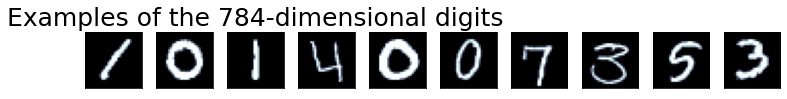

In [4]:
fig,ax=plt.subplots(
    figsize=(10,2),nrows=1,
    ncols=10,sharex=True,sharey=True)
ax=ax.flatten()
for i in range(10):
    image=train.drop("label", axis = 1).iloc[i].values.reshape(28,28)
    ax[i].imshow(image,cmap=plt.cm.bone)
ax[0].set_xticks([]); ax[0].set_yticks([])
plt.tight_layout(); plt.gcf()
ax[2].set_title(
    'Examples of the 784-dimensional digits',fontsize=25);

### 2.2 Are there any missing values?

In [5]:
print (f"There are: {train.isnull().sum().sum()} missing values.")

There are: 0 missing values.


## 3. Models
### 3.1 Pre-Processing

We don't need to complete a lot of pre-processing on this dataset.  We'll only need to create the X and y dataframes from the training data set and then split this using a **train_test_split** function.

We'll set the stratify to **y** to ensure we keep a consistent balance of numbers in our train and test data set.

In [6]:
X = train.drop("label", axis = 1)
y = train.label
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.4, random_state=42, stratify=y)

### 3.2 KNN - K Neighbors Classifier

First, we'll attempt to recognise the digits using KNN - this is a quick classifier technique, which may not be the most accurate, but it can be used as a baseline for any other model we decide to implement.

We don't know how many nearest neighbors will be best, so we should loop over a range to identify the best hyper parameter to use.

Processing n_neighbor: 1
Processing n_neighbor: 2
Processing n_neighbor: 3
Processing n_neighbor: 4
Processing n_neighbor: 5
Processing n_neighbor: 6
Processing n_neighbor: 7
Processing n_neighbor: 8


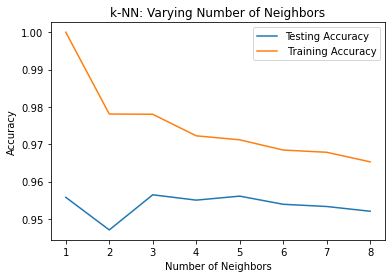

In [7]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    print(f"Processing n_neighbor: {k}")
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title("k-NN: Varying Number of Neighbors")
plt.plot(neighbors, test_accuracy, label = "Testing Accuracy")
plt.plot(neighbors, train_accuracy, label =" Training Accuracy")
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Interesting!  From the train data, it appears the best **n_neighbors** to use is 1, however from the test data, it's 3.  Let's use 3.from sklearn.metrics import classification_report

Let's predict the digits in **X_test**, using 3 **n_neighbors**

In [8]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"KNN (n_neighbors of 3) has an accuracy of: {round(metrics.accuracy_score(y_pred, y_test),3)}")
print("Classification Report")
print(classification_report(y_test, y_pred))

KNN (n_neighbors of 3) has an accuracy of: 0.956
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2479
           1       0.94      0.99      0.97      2810
           2       0.97      0.94      0.96      2506
           3       0.95      0.95      0.95      2611
           4       0.97      0.95      0.96      2443
           5       0.94      0.95      0.95      2277
           6       0.97      0.99      0.98      2482
           7       0.95      0.96      0.96      2641
           8       0.99      0.89      0.94      2438
           9       0.94      0.94      0.94      2513

    accuracy                           0.96     25200
   macro avg       0.96      0.96      0.96     25200
weighted avg       0.96      0.96      0.96     25200



Ok, so we get an accuracy of just under 96%! Not bad, but can we do better?

### 3.3 SVC - Support Vector Machines (Categorisation)
There is 784 features to each digit, most of which will be empty space / black space.

SVC can become time consuming, especially when we want to hyper tune the model.  Therefore, we'll need to reduce the feature set.

We can do this using PCA - Principle Component Analysis, for dimension reduction.

However! How many features is best?

#### Identifying the right parameters for PCA
First, we'll define a **get_models()** function that will run a PCA model, followed by an untuned SVC and analysis the results.
<br>We'll use **n_components** of:
    10
    100
    200
    250
    300
    400

We'll then define a **evaluate_model()** function, where we'll produce a cross validation score for each PCA n_component, using a cross-validation of 5.

Finally, we'll plot the results to a boxplot.

In [9]:
def get_models():
    models = dict()
    for i in [10, 100, 200, 250, 300, 400]:
        steps = [("pca", PCA(n_components=i, random_state = 42)), ("model", SVC(random_state = 42))]
        models[str(i)] = Pipeline(steps = steps)
    return models

In [10]:
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring = "accuracy", cv = 5, n_jobs=-1, error_score="raise")
    return scores

n_component: 10 has a mean accuracy score of: 0.9215 (0.0059)
n_component: 100 has a mean accuracy score of: 0.9710 (0.0034)
n_component: 200 has a mean accuracy score of: 0.9700 (0.0034)
n_component: 250 has a mean accuracy score of: 0.9699 (0.0035)
n_component: 300 has a mean accuracy score of: 0.9698 (0.0036)
n_component: 400 has a mean accuracy score of: 0.9696 (0.0033)


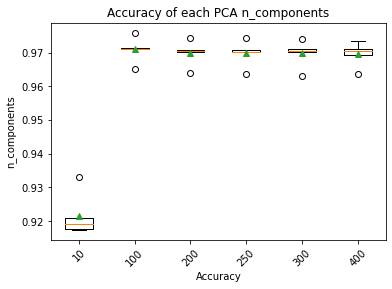

In [11]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print("n_component: %s has a mean accuracy score of: %.4f (%.4f)" % (name, np.mean(scores), np.std(scores)))

plt.boxplot(results, labels = names, showmeans = True)
plt.title("Accuracy of each PCA n_components")
plt.xlabel("Accuracy")
plt.ylabel("n_components")
plt.xticks(rotation = 45)
plt.show()

It looks like we get best results with 100 components, with slightly worse result when we use a higher number of components.  Using only 10 leads to the worst result.

#### Hyper Tuning the SVC model
We now need to hyper tune the SVC model, using the following hyper parameters:

    hyper_params = [{'model__C': [3, 4, 5], "model__gamma": ["auto", "scale"], 'model__kernel': ['poly']},
                    {'model__C': [3, 4, 5], "model__gamma": ["auto", "scale"], 'model__kernel': ['rbf']} ]

This will take some time to process.

In [12]:
PCA_Pipeline = Pipeline(steps=[('pca', PCA(n_components=100, random_state=42)),
                               ('model', SVC(random_state=42))])

# Set the parameters by cross-validation
hyper_params = [{'model__C': [3, 4, 5], "model__gamma": ["auto", "scale"], 'model__kernel': ['poly']},
                {'model__C': [3, 4, 5], "model__gamma": ["auto", "scale"], 'model__kernel': ['rbf']} ]

From running this previously, the best result is

    {'model__C': 3, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

For speed, we'll set this as the only hyper_parameter to use:

In [13]:
hyper_params = [{'model__C': [3], "model__gamma": ["scale"], 'model__kernel': ['rbf']} ]

In [14]:
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = PCA_Pipeline, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = KFold(), 
                        n_jobs = -1,
                        verbose = 2,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=100, random_state=42)),
                                       ('model', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'model__C': [3], 'model__gamma': ['scale'],
                          'model__kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [15]:
print("The best parameters are:")
model_cv.best_params_

The best parameters are:


{'model__C': 3, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

Ok, let's use this best estimator on our test data

In [16]:
#Extract the best estimator
best_model = model_cv.best_estimator_

# Predict the test set probabilities of the positive class
y_pred = best_model.predict(X_test)


In [17]:
print(f"Accuracy of our hyper-tunned model is: {round(metrics.accuracy_score(y_pred, y_test),3)}")

Accuracy of our hyper-tunned model is: 0.976


In [18]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2479
           1       0.99      0.99      0.99      2810
           2       0.97      0.98      0.97      2506
           3       0.97      0.97      0.97      2611
           4       0.97      0.98      0.98      2443
           5       0.97      0.97      0.97      2277
           6       0.98      0.99      0.99      2482
           7       0.98      0.97      0.98      2641
           8       0.97      0.97      0.97      2438
           9       0.97      0.96      0.96      2513

    accuracy                           0.98     25200
   macro avg       0.98      0.98      0.98     25200
weighted avg       0.98      0.98      0.98     25200



Fantastic! We have a really good score, using just 40% of the training data.  Now we know which model to use and which hyper-parameters, let's retrain the best model on the entire train.csv dataset, so we can predict our test.csv data on even more training data.

In [19]:
best_model.fit(X, y)
final_y_pred = best_model.predict(test)

## 4. Submission

In [20]:
# Submitting Prediction
submission = pd.DataFrame({'ImageId': test.index+1, 'Label': final_y_pred})
print("Head of submission data frame")
submission.head()

Head of submission data frame


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [21]:
submission.to_csv('submission.csv', index=False)
print('Submission saved.')

Submission saved.
